## DEVELOPMENT OF A MALARIA DETECTION MODEL

### BACKGROUND
In Nigeria, where malaria remains a significant public health threat, researchers are exploring the potential of 
machine learning to revolutionize detection and diagnosis. This project aims to develop a machine learning model capable of 
accurately identifying malaria parasites in blood samples. By leveraging image analysis techniques and robust algorithms, the
model seeks to address limitations of traditional microscopic diagnosis, offering faster, more objective, and potentially 
more accessible solutions for resource-constrained settings. Ultimately, this project strives to contribute to the fight 
against malaria in Nigeria by empowering healthcare professionals with a powerful diagnostic tool.

### AIMS & OBJECTIVES
This project aims to develop a machine learning model capable of accurately identifying malaria parasites in blood samples.

### OBJECTIVES
* Develop a machine learning model that surpasses traditional microscopy in both accuracy and efficiency
* Design a model that can be integrated into cost-effective and portable devices
* Build a system that can analyze large datasets to predict malaria outbreaks

## DATA COLLECTION METHOD
The data for this project was collected from kaggle, this website provided us with images of cells that are infected with the 
malaria parasite and images that are clean. This was a resource utilized in the training of the model.
The link to the resource is referred below:-
    * https://www.kaggle.com/datasets/iarunava/cell-images-for-detecting-malaria

## MODEL SELECTION

### Why use a CNN for Malaria Detection?
* Image Expertise: CNNs excel at analyzing images, naturally extracting features like shapes, textures, and edges crucial for 
identifying malaria parasites in cells.

* Automatic Feature Learning: No need for manual feature engineering, the CNN learns these features itself from the data,
potentially uncovering hidden patterns missed by humans.

* High Accuracy: Recent studies show CNNs achieving accuracy comparable to trained microscopists, offering objective and 
consistent diagnoses.

### Limitations of CNNs for Malaria Detection:
* Data Dependence: Performance relies heavily on the quality and quantity of training data. Limited or biased data can lead to 
inaccurate or unfair models.

* Interpretability: Understanding how a CNN arrives at a decision can be challenging, making it difficult to explain 
results or identify potential biases.

* Computational Cost: Training large CNNs requires significant computational resources and power, potentially limiting 
their use in resource-scarce settings.


### Now, Shall we begin?

## Step 1 (Importing the Necessary Libraries, Functions and Modules)

In [3]:
import numpy as np

#Establish a fixed value for the `numpy` pseudo-random generator.
#This helps with repeatable results everytime you run the code. 
np.random.seed(1000)

import matplotlib.pyplot as plt
import os
import cv2
from PIL import Image
import keras

os.environ['KERAS_BACKEND'] = 'tensorflow' # added to configure Tensorflow as the backend
 

### Purposes for each Library:

* matplotlib.pyplot as plt: Creates visualizations of images and data.
* os: Interacts with the operating system to manage files and directories.
* cv2: Offers advanced image processing and manipulation capabilities.
* from PIL import Image: Opens, reads, and manipulates various image formats.
* keras: Builds and trains deep learning models, particularly the CNN.

## Step 2 (Accessing the data and defining the labels)

In [4]:
image_directory = 'cell_images2/' #Sets the path to the image directory.
SIZE = 64  #Assigns a uniform size to resize images.
dataset = []    #Initializes empty lists to hold image data.
label = []  #Initializes empty lists to hold image labels.

### What does the data we're working with even look like abeg??

* ### UNINFECTED CELL

<img src="clean.png"/>

* ### INFECTED CELL

<img src="unclean.png"/>

In [5]:
parasitized_images = os.listdir(image_directory + 'Parasitized/') # Retrieves a list of 'Parasitized' image filenames.
for i, image_name in enumerate(parasitized_images):    # Iterates through each 'Parasitized' image.
    
    if (image_name.split('.')[1] == 'png'):  # Checks if the image format is PNG.
        image = cv2.imread(image_directory + 'Parasitized/' + image_name)  # Reads the image using OpenCV
        image = Image.fromarray(image, 'RGB')  # Converts image to RGB format using PIL.
        image = image.resize((SIZE, SIZE))  # Resizes image to 64x64 pixels.
        dataset.append(np.array(image)) # Appends the image as a NumPy array to the 'dataset' list.
        label.append(0) # Appends the label '0' (indicating parasitized) to the 'label' list.


# (Similar process for uninfected images, but with label 1): 
# We repeated the same steps for 'Uninfected' images, assigning them label '1'.

uninfected_images = os.listdir(image_directory + 'Uninfected/')
for i, image_name in enumerate(uninfected_images):
    if (image_name.split('.')[1] == 'png'):
        image = cv2.imread(image_directory + 'Uninfected/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(1)

In [8]:
print(parasitized_images[:5])

['C100P61ThinF_IMG_20150918_144104_cell_162.png', 'C100P61ThinF_IMG_20150918_144104_cell_163.png', 'C100P61ThinF_IMG_20150918_144104_cell_164.png', 'C100P61ThinF_IMG_20150918_144104_cell_165.png', 'C100P61ThinF_IMG_20150918_144104_cell_166.png']


## Step 3 (Model Architecture Definition and Compilation)

### Explanation: 
This section of the code defines the structure of the convolutional neural network (CNN) model used for classifying 
malaria-infected cells and compiles it for training. It encompasses the following key steps:
* Input Layer: Establishes the expected input shape for images.


* Convolutional Layers: Extract features from the images using filters.


* Pooling Layers: Reduce feature map size for efficiency.


* Batch Normalization Layers: Normalize activations for faster training and stability.


* Dropout Layers: Randomly drop connections to prevent overfitting.


* Flatten Layer: Transforms 2D feature maps into a 1D vector.


* Dense Layers: Perform classification based on extracted features.


* Output Layer: Produces final predictions for each class (infected or uninfected).

In [4]:
INPUT_SHAPE = (SIZE, SIZE, 3)   #Specifies the expected input image shape (height, width, channels)
inp = keras.layers.Input(shape=INPUT_SHAPE) # Creates the model's input layer.

conv1 = keras.layers.Conv2D(32, kernel_size=(3, 3), 
                               activation='relu', padding='same')(inp)  # Convolutional layer extracts features using filters
pool1 = keras.layers.MaxPooling2D(pool_size=(2, 2))(conv1)   # Max pooling layer reduces feature map size for efficiency
norm1 = keras.layers.BatchNormalization(axis = -1)(pool1) # Batch normalization layer normalizes activations for faster training
drop1 = keras.layers.Dropout(rate=0.2)(norm1) # Dropout layer randomly drops connections to prevent overfitting 


conv2 = keras.layers.Conv2D(32, kernel_size=(3, 3), 
                               activation='relu', padding='same')(drop1)
pool2 = keras.layers.MaxPooling2D(pool_size=(2, 2))(conv2)
norm2 = keras.layers.BatchNormalization(axis = -1)(pool2)
drop2 = keras.layers.Dropout(rate=0.2)(norm2)


flat = keras.layers.Flatten()(drop2)  #Flattens the 2D feature maps into a 1D vector for dense layers.


hidden1 = keras.layers.Dense(512, activation='relu')(flat)#Fully connected layer for learning non-linear combinations of features
norm3 = keras.layers.BatchNormalization(axis = -1)(hidden1)  # Normalizes activations for faster training.
drop3 = keras.layers.Dropout(rate=0.2)(norm3) #Randomly drops connections to prevent overfitting.
hidden2 = keras.layers.Dense(256, activation='relu')(drop3)#Fully connected layer for learning non-linear combinations of features
norm4 = keras.layers.BatchNormalization(axis = -1)(hidden2)  # Normalizes activations for faster training.
drop4 = keras.layers.Dropout(rate=0.2)(norm4) #Randomly drops connections to prevent overfitting.


out = keras.layers.Dense(2, activation='sigmoid')(drop4) #Final output layer with two units (one for each class) and sigmoid- 
                                                         #-activation for binary classification.

    
model = keras.Model(inputs=inp, outputs=out) # Creates the complete model with specified inputs and outputs.
model.compile(optimizer='adam', #for efficient gradient descent.
                loss='categorical_crossentropy',   # Check between binary_crossentropy and categorical_crossentropy
                metrics=['accuracy']) # to track model performance.


print(model.summary()) #Prints a summary of the model's architecture.

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248  

## Step 4 (Training and Evaluating the Malaria Detection Model) 

### Explanation:
This section of code trains the deep learning model to detect malaria-infected cells in images and then evaluates its accuracy 
on unseen test data. It contains the following steps:

* Data Splitting for Training and Testing :
    The dataset is divided into 80% for training and 20% for testing to ensure unbiased evaluation.
    Labels are noe-hot encoded to representt multiple classes (infected or uninfected cells)
    A fixed random state guarantees consistent splits for reproducibiliy
    
    
* Model Training with Key Parameters


* Validation Split for Monitoring:
    A 10% validation splitt is used to assess model performance during training and prevent overfitting.
    
    
* Evaluation on Test Data:
    The trained model is evaluated on the unseen test data to measure its accuracy on new samples.
    
    
* Accuracy Calculation and Reporting:
    The final test accuracy is calculated and printed as a percentage to gauge the model's effectiveness in classifying 
    malaria-infected cells.


In [5]:
from sklearn.model_selection import train_test_split # Imports a function to split data into training and testing sets.
from keras.utils import to_categorical # Imports a function to convert labels to one-hot encoded format.


X_train, X_test, y_train, y_test = train_test_split(dataset, to_categorical(np.array(label)), test_size = 0.20, random_state = 0)

# The above code splits the data and labels:
# 1. 80% for training, 20% for testing
# 2. One-hot encodes labels for multi-class classification
# 3. Ensures consistent splits witth a fixed random state.

#Fit the model
history = model.fit(np.array(X_train), 
                         y_train, 
                         batch_size = 64, 
                         verbose = 1, 
                         epochs = 5,      
                         validation_split = 0.1,
                         shuffle = False
                      
                     )

# The above code 'model.fit()' trains the model using specified parameters:
 # np.array(X_train), y_train: Training data and labels.
 # batch_size=64: Processes 64 samples per batch.
 # verbose=1: Displays progress during training.
 # epochs=5: Iterates through the training data 5 times.
 # validation_split=0.1: Uses 10% of training data for validation.
 # shuffle=False: Disables data shuffling before each epoch.



print("Test_Accuracy: {:.2f}%".format(model.evaluate(np.array(X_test), np.array(y_test))[1]*100))
# The above code 'print("Test_Accuracy: {:.2f}%".format(...))': Prints the model's accuracy on the test data:
  # model.evaluate(): Evaluates the model on the test data
  # *[1]100: Extracts the accuracy value and formats it as a percentage.


Epoch 1/5
311/311 [==============================] - 64s 194ms/step - loss: 0.4620 - accuracy: 0.8076 - val_loss: 0.3835 - val_accuracy: 0.8426
Epoch 2/5
311/311 [==============================] - 59s 191ms/step - loss: 0.2262 - accuracy: 0.9172 - val_loss: 0.1685 - val_accuracy: 0.9347
Epoch 3/5
311/311 [==============================] - 60s 192ms/step - loss: 0.1881 - accuracy: 0.9331 - val_loss: 0.1730 - val_accuracy: 0.9356
Epoch 4/5
311/311 [==============================] - 59s 191ms/step - loss: 0.1628 - accuracy: 0.9424 - val_loss: 0.2530 - val_accuracy: 0.9029
Epoch 5/5
173/173 [==============================] - 4s 25ms/step - loss: 0.1696 - accuracy: 0.9412
Test_Accuracy: 94.12%


## Step 5 (Visualizing Model Performance through Training and Validattion Curves)

### General Reasons for the Plots:
These plots serve to graphically represent the performance of your trained model
during the training process. They capture two key metrics: accuracy and loss,
both plotted against the number of training epochs. Analyzing these curves helps
you understand:

   * Learning progress: How well the model learns to distinguish between 
        infected and uninfected cells as training progresses.
        
        
   * Overfitting: If the model is memorizing the training data too well, 
        leading to poor performance on unseen data.
       
       
   * Generalization ability: How well the model translates its learnings to 
        new, unseen samples.

In this malaria detection project, understanding the model's performance is crucial. These plots provide valuable insights into:

* Effectiveness of the chosen architecture and hyperparameters: Whether the model architecture and training settings are suitable for the classification task.


* Potential for overfitting: If the validation accuracy plateaus or dips while training accuracy keeps rising, it suggests overfitting, which is problematic for real-world deployment.


* Need for further optimization: These plots can guide you in adjusting hyperparameters or exploring different model architectures to improve generalization and achieve higher accuracy.

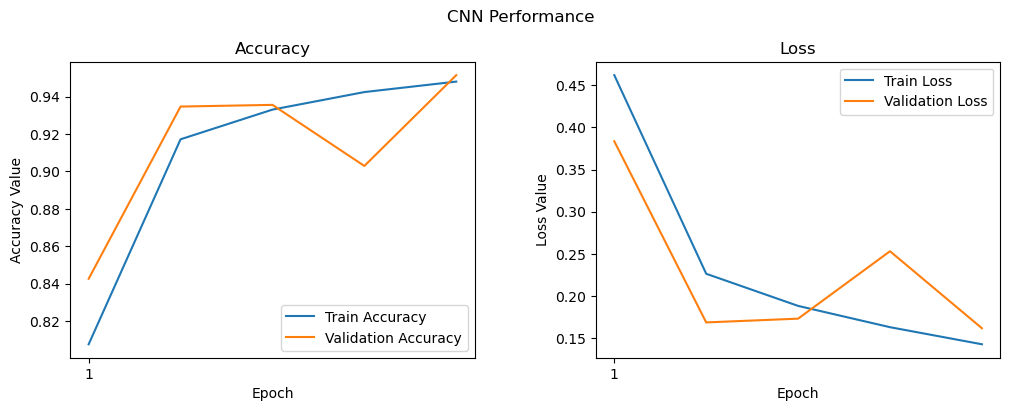

In [6]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4)) # Creates a figure with two subplots for visualization.
t = f.suptitle('CNN Performance', fontsize=12) # Adds a title to the overall figure.
f.subplots_adjust(top=0.85, wspace=0.3) # Adjusts spacing for better visibility.

max_epoch = len(history.history['accuracy'])+1 # Determines the total number of epochs.
epoch_list = list(range(1,max_epoch)) # Creates a list of epoch numbers for plotting.
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy') # Plots accuracy curves for training on the first subplot.
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy') # Plots accuracy curves for training on the first subplot.
ax1.set_xticks(np.arange(1, max_epoch, 5)) 
ax1.set_ylabel('Accuracy Value') 
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best") #places the legend at a position that won't mess with the plot.
#`ax1.set` generally sets labels, title and legend for the accuracy plot

ax2.plot(epoch_list, history.history['loss'], label='Train Loss') # Plots loss curves for training on the second subplot.
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss') # Plots loss curves for training on the second subplot.
ax2.set_xticks(np.arange(1, max_epoch, 5)) 
ax2.set_ylabel('Loss Value') 
ax2.set_xlabel('Epoch') 
ax2.set_title('Loss') 
l2 = ax2.legend(loc="best") # Basically places the legend at a position that won't mess with the plot.
# `ax2.set` generally sets labels, title and legend for the accuracy plot

## Step 6 (Saving the Model)

In [7]:
model.save('malaria_cnn.h5')

C:\Anaconda\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
